In [2]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

#this makes my plots pretty! but it is totally not mandatory to do it
import json
c=json.load(open('pui.json'))
pl.rcParams.update(c)
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [5]:
jan=pd.read_csv('jan.csv')
feb=pd.read_csv('feb.csv')
#march=pd.read_csv('march.csv')
april=pd.read_csv('april.csv')
may=pd.read_csv('may.csv')
#june=pd.read_csv('june.csv')

In [6]:
df_W=pd.concat([jan,feb],keys=['x','y'])
df_S=pd.concat([april,may],keys=['x','y'])

In [16]:
len(df_W)
len(jan)
df_W[285552:285556]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985,2


In [7]:
df_W['age'] = 2015-df_W['birth year'][(df_W['usertype'] == 'Subscriber')]
df_S['age'] = 2015-df_S['birth year'][(df_S['usertype'] == 'Subscriber')]

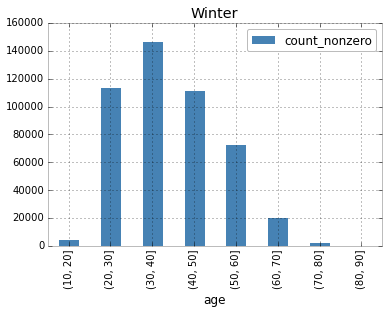

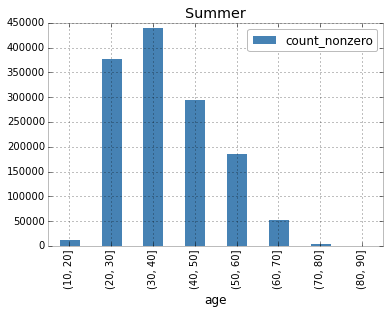

In [8]:
bins = np.arange(10, 99, 10)
df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
W_age_dist = df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero])
df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
S_age_dist = df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero])
    

In [9]:
ksW=scipy.stats.kstest(W_age_dist, 'norm')
ksS=scipy.stats.kstest(S_age_dist, 'norm')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

#compare to poisson 

ksW=scipy.stats.kstest(W_age_dist, 'cauchy')
ksS=scipy.stats.kstest(S_age_dist, 'cauchy')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)
winter, normal fit (0.99999783543649534, 0.0)
summer, normal fit (0.99999927992497206, 0.0)


As the p-value is 0, we need to reject the hypothesis. i am relying on the pvalue as my sample size is greater than 500. Much greater, 
so it stands more reliable than ks statistic

In [10]:
ksW=scipy.stats.kstest(W_age_dist, 'gamma', args=(35,))
ksS=scipy.stats.kstest(S_age_dist, 'gamma', args=(35,))

print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)


In [11]:
def mydistribution(size, m0, m1):
    #I also tried 
    return (np.empty_like(size)+1) * m0 **2

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


In [12]:
ksW=scipy.stats.kstest(W_age_dist, mydistribution, args=(35,38))
ksS=scipy.stats.kstest(S_age_dist, mydistribution, args=(35,38))

print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit (541513700.0, nan)
summer, normal fit (180143600.0, nan)


In [17]:
ageW = np.array([a for a in df_W.age if not np.isnan(a)])
ageS = np.array([b for b in df_S.age if not np.isnan(b)])
new_ageS = np.random.choice(ageS, len(ageW), replace = False)

adW=scipy.stats.anderson(ageW, 'norm')
adS=scipy.stats.anderson(new_ageS, 'norm')
print "winter, normal fit", adW
print "summer, normal fit", adS

#compare to poisson 

adW=scipy.stats.anderson(ageW, 'expon')
adS=scipy.stats.anderson(new_ageS, 'expon')
print "winter, normal fit", adW
print "summer, normal fit", adS

winter, normal fit (4556.0239068368101, array([ 0.576,  0.656,  0.787,  0.918,  1.092]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
summer, normal fit (6365.2269446168793, array([ 0.576,  0.656,  0.787,  0.918,  1.092]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
winter, normal fit (111160.74280180549, array([ 0.922,  1.078,  1.341,  1.606,  1.957]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
summer, normal fit (110774.56261410925, array([ 0.922,  1.078,  1.341,  1.606,  1.957]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [ ]:
Froom the values,(15,10,5,2.5) we see that the samples come from the distributions tried for 

In [18]:
adW=scipy.stats.anderson(ageW, 'gumbel')
adS=scipy.stats.anderson(new_ageS, 'gumbel')
print "winter, normal fit", adW
print "summer, normal fit", adS

winter, normal fit (inf, array([ 0.474,  0.637,  0.757,  0.877,  1.038]), array([ 25. ,  10. ,   5. ,   2.5,   1. ]))
summer, normal fit (inf, array([ 0.474,  0.637,  0.757,  0.877,  1.038]), array([ 25. ,  10. ,   5. ,   2.5,   1. ]))


So here, with the values they is a goodness of fit with gumbel distribution as its values are 
25,10,5,2.5,1